In [14]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import rasterio as rio
from rasterio.plot import show

pd.set_option('display.max_columns', None)

In [15]:
data = pd.read_csv('C:\\Temp\\MRes\\training_data\\AB_6cat_slim.csv')

In [16]:
data.head()

,GENUS,All.returns.above.2,All.returns.above.mean,All.returns.above.mode,Canopy.relief.ratio,First.returns.above.2,First.returns.above.mean,First.returns.above.mode,H01TH,H05TH,H10TH,H15TH,H20TH,H25TH,H30TH,H35TH,H40TH,H45TH,H50TH,H55TH,H60TH,H65TH,H70TH,H75TH,H80TH,H90TH,H95TH,H99TH,HCV,HKUR,HMAX,HMEADIAN,HMEAN,HMODE,HSD,HSKE,HVAR,I01TH,I05TH,I10TH,I15TH,I20TH,I25TH,I30TH,I35TH,I40TH,I45TH,I50TH,I55TH,I60TH,ICV,IKUR,IMAX,IMEADIAN,IMEAN,IMODE,IP65,IP70,IP75,IP80,IP90,IP95,IP99,ISD,ISKE,IVAR,Percentage.all.returns.above.mean,Percentage.all.returns.above.mode,Percentage.first.returns.above.mean,Percentage.first.returns.above.mode,Return.1.count.above.2,Return.2.count.above.2,Return.3.count.2,Return.4.count.2,Return.5.count.2,Return.6.count.2,Return.7.count.above.2,Total.all.return.count,Total.all.return.count.above.2,Total.first.return.count,b_max,b_mean,b_median,b_min,crownArea,g_max,g_mean,g_median,g_min,geometry,r_max,r_mean,r_median,r_min
0,Fraxinus,14601,6977,1783,0.402938,7967,5032,5732,5.11,5.47,5.99,6.52,6.96,7.48,7.91,8.33,8.75,9.12,9.65,10.13,10.81,11.41,11.89,12.27,13.14,13.69,14.46,15.96,29.25,1.98,17.07,9.65,9.86,8.84,2.89,0.15,8.33,459.00,537.0,650.0,781.0,937.0,1121.0,1321.0,1548.00,1790.0,2074.0,2381.0,2714.0,3038.0,66.48,2.38,9264,2381.0,2749.84,462,3391.00,3740.0,4127.00,4955.0,5448.0,6095.0,7187.00,1828.13,0.61,3342068.85,47.784398,12.211492,63.160537,71.946780,7967,4612,1626,362,34,0,0,14601,14601,7967,139,66.385551,65.0,10,236.70,160,89.357964,90.0,34,"POLYGON ((423597.3 564829.8, 423597.3 564829.5...",152,79.550824,80.0,24
1,Tilia,1920,827,942,0.329585,1416,723,811,5.04,5.18,5.33,5.45,5.62,5.75,5.88,6.01,6.13,6.24,6.33,6.43,6.55,6.70,6.91,7.14,7.63,7.91,8.10,8.71,14.31,2.47,9.49,6.33,6.48,6.34,0.93,0.51,0.86,488.38,689.8,920.6,1076.7,1279.0,1446.0,1622.4,1828.00,2019.0,2187.0,2396.0,2594.9,2845.8,57.01,2.96,8143,2396.0,2670.93,879,3064.40,3321.5,3622.75,4373.3,4933.4,5497.2,6831.53,1522.59,0.73,2318274.94,43.072917,49.062500,51.059322,57.274011,1416,433,66,5,0,0,0,1920,1920,1416,142,64.965399,64.0,1,67.05,181,94.354064,89.0,36,"POLYGON ((423712.8 564644.1, 423712.8 564643.8...",200,104.325578,93.0,33
2,Acer,1015,572,798,0.556663,708,527,244,5.06,5.34,5.65,6.16,6.70,7.15,7.57,7.95,8.42,9.15,9.59,10.04,10.25,10.43,10.69,10.90,11.36,11.48,11.63,11.96,23.84,1.77,12.20,9.59,9.01,10.90,2.15,-0.39,4.61,453.00,517.0,620.6,808.2,1050.8,1462.5,2222.2,3103.00,3745.0,4342.3,4888.0,5400.2,5907.4,62.31,1.67,10579,4888.0,4533.38,444,6305.30,6624.6,6900.50,7711.5,8054.4,8659.2,9642.54,2824.58,-0.06,7978231.46,56.354680,78.620690,74.435028,34.463277,708,206,77,22,1,1,0,1015,1015,708,127,60.392079,58.0,1,45.45,153,83.174697,82.0,37,"POLYGON ((423819.9 564730.2, 423819.9 564729.9...",153,76.669527,76.0,28
3,Acer,366,202,189,0.440053,337,199,187,5.05,5.18,5.26,5.35,5.49,5.62,5.69,5.79,5.97,6.15,6.21,6.28,6.33,6.40,6.48,6.56,6.76,6.91,7.02,7.31,9.77,1.98,7.53,6.21,6.11,6.19,0.60,-0.05,0.36,615.30,1255.0,1680.0,2468.0,3191.0,3687.0,4109.0,4408.25,4700.0,4954.5,5196.0,5527.0,5852.0,45.95,2.23,10346,5196.0,5328.16,4331,6300.25,6722.0,7164.50,8163.5,8880.0,9305.5,10190.25,2448.45,0.00,5994906.73,55.191257,51.639344,59.050445,55.489614,337,29,0,0,0,0,0,366,366,337,124,64.554241,62.0,18,15.21,146,81.047995,81.0,32,"POLYGON ((423469.5 564817.8, 423469.5 564817.5...",139,77.166995,74.0,29
4,Acer,177,126,96,0.802231,142,124,79,6.05,7.56,10.16,11.30,11.95,12.09,12.29,12.52,12.62,12.71,12.84,12.89,12.94,12.98,13.05,13.12,13.21,13.31,13.38,13.71,13.65,7.95,13.74,12.84,12.20,12.89,1.67,-2.34,2.77,483.76,658.4,1315.0,1622.6,2280.2,3000.0,3809.2,4389.60,4794.2,5206.2,5568.0,5878.2,6266.0,48.64,2.00,9915,5568.0,5062.11,1228,6551.00,6797.0,7054.00,7679.2,7880.8,8214.6,9003.28,2462.13,-0.41,6062069.68,71.186441,54.237288,87.323944,55.633803,142,32,2,1,0,0,0,177,177,142,135,64.611111,63.0,24,4.68,156,84.782051,83.0,44,"POLYGON ((423754.2 564619.8, 423754.2 564619.5...",148,76.688034,75.0,34


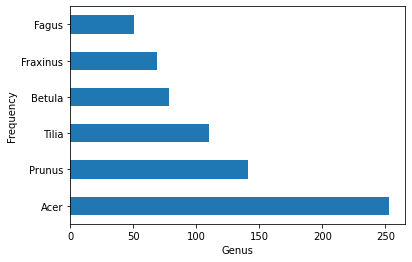

In [10]:
ax = data['GENUS'].value_counts().plot(kind='barh')
ax.set_xlabel("Genus")
ax.set_ylabel("Frequency")

plt.savefig('C:\\Temp\\MRes\\Figures\\class_frequency.eps', bbox_inches='tight')
plt.show()

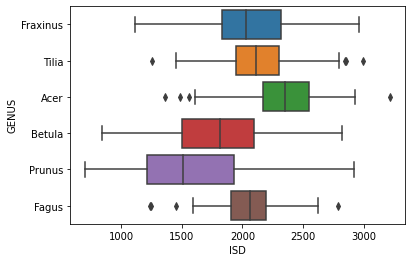

In [21]:
sns.boxplot(x = 'ISD', y = 'GENUS', data=data)

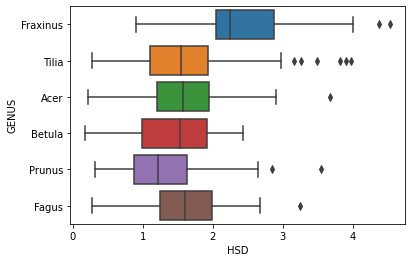

In [23]:
sns.boxplot(x='HSD', y = 'GENUS', data=data)

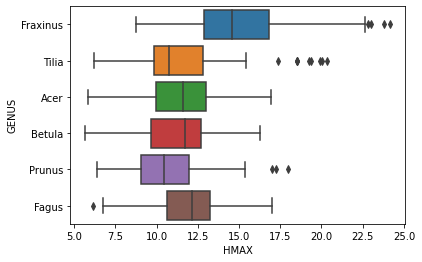

In [25]:
sns.boxplot(x='HMAX', y = 'GENUS', data=data)

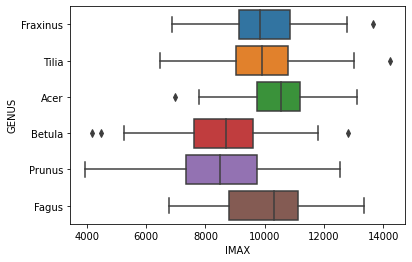

In [26]:
sns.boxplot(x='IMAX', y = 'GENUS', data=data)

In [36]:
i_data = pd.read_csv('C:\\Temp\\MRes\\training_data\\intensity_features.csv')

In [33]:
i_data.head()

,GENUS,I01TH,I05TH,I10TH,I15TH,I20TH,I25TH,I30TH,I35TH,I40TH,I45TH,I50TH,I55TH,I60TH,ICV,IKUR,IMAX,IMEADIAN,IMEAN,IMODE,IP65,IP70,IP75,IP80,IP90,IP95,IP99,ISD,ISKE,IVAR
0,Fraxinus,459.00,537.0,650.0,781.0,937.0,1121.0,1321.0,1548.00,1790.0,2074.0,2381.0,2714.0,3038.0,66.48,2.38,9264,2381.0,2749.84,462,3391.00,3740.0,4127.00,4955.0,5448.0,6095.0,7187.00,1828.13,0.61,3342068.85
1,Tilia,488.38,689.8,920.6,1076.7,1279.0,1446.0,1622.4,1828.00,2019.0,2187.0,2396.0,2594.9,2845.8,57.01,2.96,8143,2396.0,2670.93,879,3064.40,3321.5,3622.75,4373.3,4933.4,5497.2,6831.53,1522.59,0.73,2318274.94
2,Acer,453.00,517.0,620.6,808.2,1050.8,1462.5,2222.2,3103.00,3745.0,4342.3,4888.0,5400.2,5907.4,62.31,1.67,10579,4888.0,4533.38,444,6305.30,6624.6,6900.50,7711.5,8054.4,8659.2,9642.54,2824.58,-0.06,7978231.46
3,Acer,615.30,1255.0,1680.0,2468.0,3191.0,3687.0,4109.0,4408.25,4700.0,4954.5,5196.0,5527.0,5852.0,45.95,2.23,10346,5196.0,5328.16,4331,6300.25,6722.0,7164.50,8163.5,8880.0,9305.5,10190.25,2448.45,0.00,5994906.73
4,Acer,483.76,658.4,1315.0,1622.6,2280.2,3000.0,3809.2,4389.60,4794.2,5206.2,5568.0,5878.2,6266.0,48.64,2.00,9915,5568.0,5062.11,1228,6551.00,6797.0,7054.00,7679.2,7880.8,8214.6,9003.28,2462.13,-0.41,6062069.68


In [37]:
i_data = i_data[['GENUS', 'ISD', 'IP95', 'IVAR', 'IP90', 'IP75']]

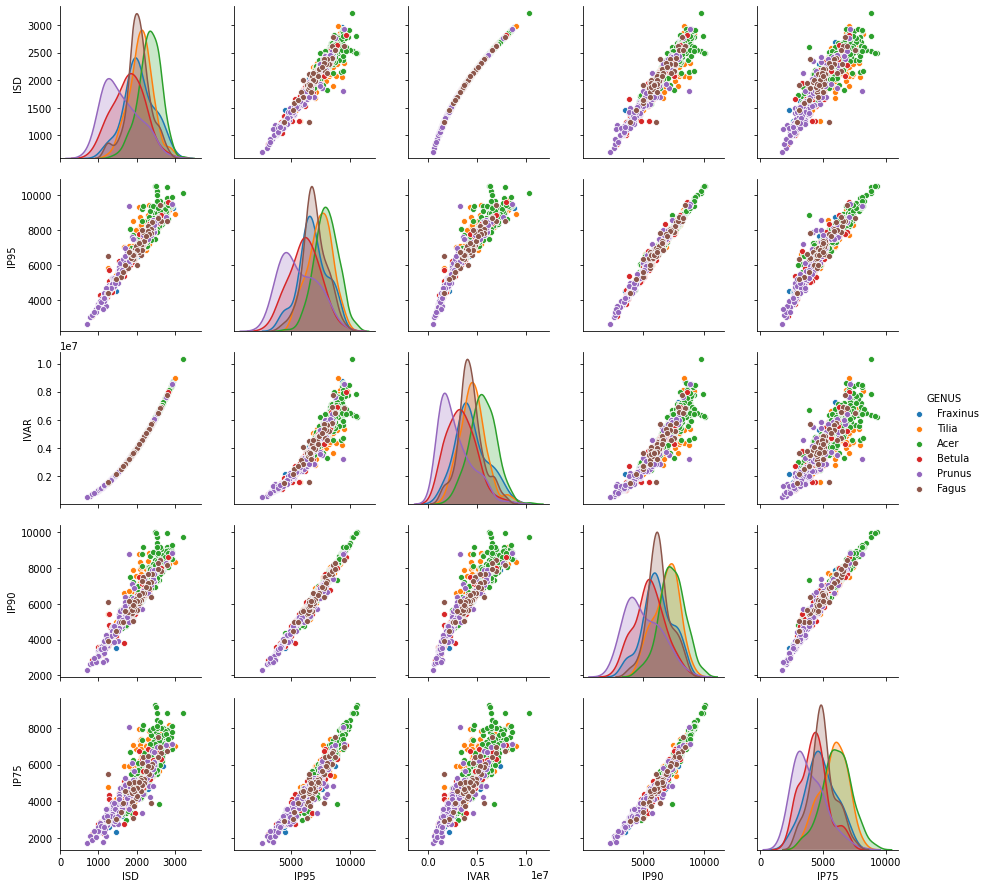

In [56]:
sns.pairplot(i_data, hue='GENUS')
plt.savefig('C:\\Temp\\MRes\\Figures\\int_feature_scatter.png' , bbox_inches='tight')
plt.show()

In [51]:
g_data = pd.read_csv('C:\\Temp\\MRes\\training_data\\geometric_features.csv')

In [52]:
g_data = g_data[['GENUS', 'Canopy.relief.ratio', 'HMAX', 'Percentage.first.returns.above.mean', 'Percentage.first.returns.above.mode', 'H75TH']]

In [53]:
g_data = g_data.rename(columns={'Percentage.first.returns.above.mean' : '%_first_above_mean', 'Percentage.first.returns.above.mode' : '%_first_above_mode'})

In [49]:
g_data.head()

,GENUS,Canopy.relief.ratio,HMAX,Percentage.first.returns.above.mean,Percentage.first.returns.above.mode
0,Fraxinus,0.402938,17.07,63.160537,71.946780
1,Tilia,0.329585,9.49,51.059322,57.274011
2,Acer,0.556663,12.20,74.435028,34.463277
3,Acer,0.440053,7.53,59.050445,55.489614
4,Acer,0.802231,13.74,87.323944,55.633803


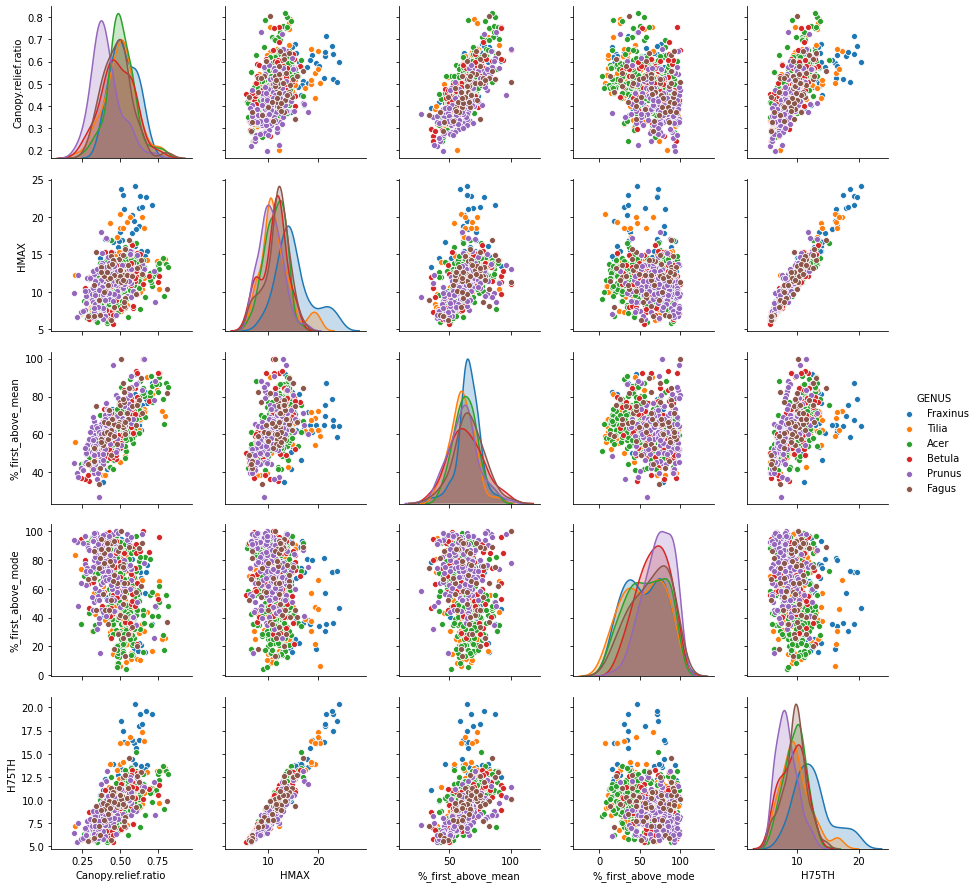

In [58]:
sns.pairplot(g_data, hue='GENUS')
plt.savefig('C:\\Temp\\MRes\\Figures\\geo_feature_scatter.png' , bbox_inches='tight')
plt.show()

In [62]:
r_data = pd.read_csv('C:\\Temp\\MRes\\training_data\\rgb_features.csv')

In [63]:
r_data = r_data[['GENUS', 'b_min', 'b_max', 'b_mean', 'g_max', 'r_mean']]

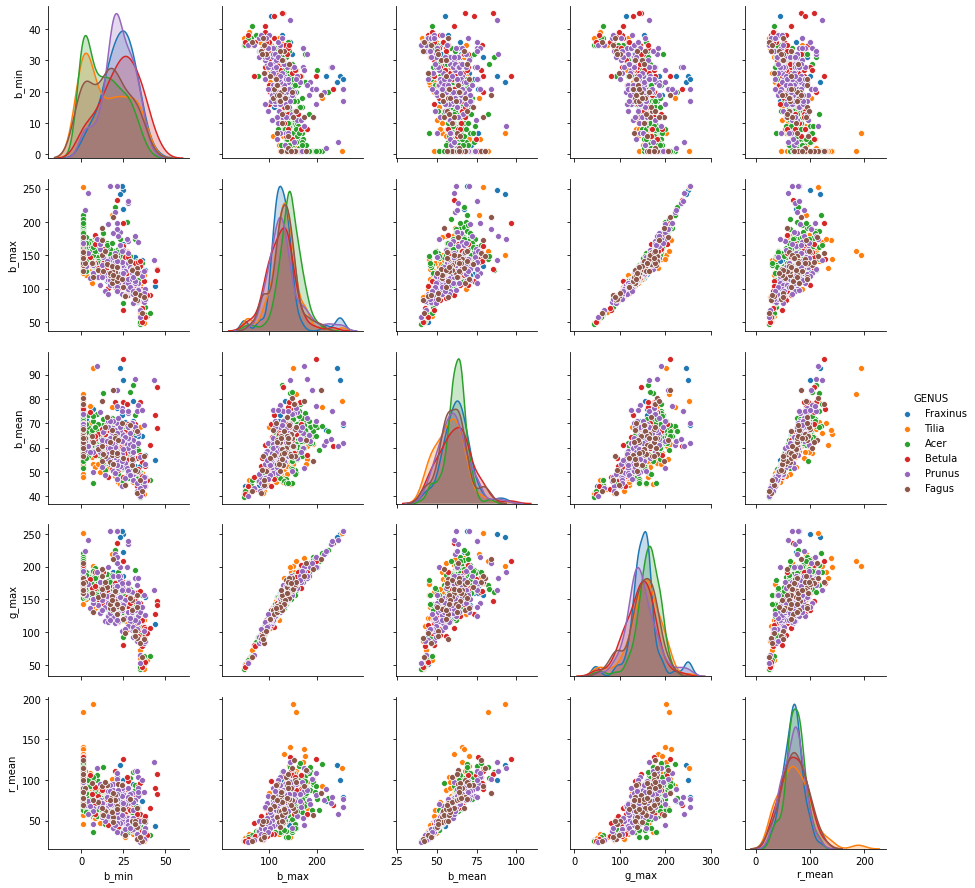

In [64]:
sns.pairplot(r_data, hue='GENUS')
plt.savefig('C:\\Temp\\MRes\\Figures\\rgb_feature_scatter.png' , bbox_inches='tight')
plt.show()